In [1]:
import numpy as np
import pandas as pd

In [5]:
class Perceptron(object):
    """
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    ----------
    w_ : id_array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number os samples and n_features is the number of features.
            y: arra-like, shape = [n_samples] Target values.
            
            Returns
            --------
            self : object
            """
        self.w_ = np.zeros(1 + X.shape[1]) # returns [0, 0, 0]?
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [29]:
data = pd.read_csv('demo/data/iris.csv', header=None)

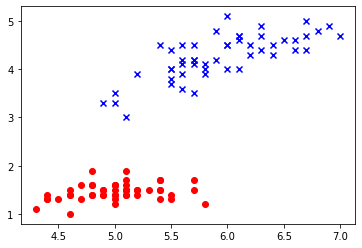

In [37]:
import matplotlib.pyplot as plt
# In the dataset, the first 50 rows are setosa, and the second 50 rows are versicolor
y = data.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)
X = data.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],
           color = 'red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color = 'blue', marker='x', label='versicolor')
plt.show()

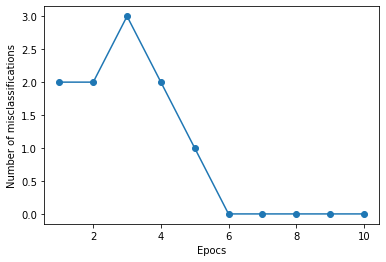

In [42]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epocs')
plt.ylabel('Number of misclassifications')
plt.show()

In [44]:
# Visualize the decision boundaries for 2D datasets:
from matplotlib.colors import ListedColormap

"""
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # sort the array distinctively, and get the listed color map
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() = 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    """

"\ndef plot_decision_regions(X, y, classifier, resolution=0.02):\n    \n    # setup marker generator and color map\n    markers = ('s', 'x', 'o', '^', 'v')\n    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')\n    cmap = ListedColormap(colors[:len(np.unique(y))]) # sort the array distinctively, and get the listed color map\n    \n    # plot the decision surface\n    x1_min, x1_max = X[:, 0].min() = 1, X[:, 0].max() + 1\n    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1\n    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),\n                          np.arange(x2_min, x2_max, resolution))\n    "